In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Heart_disease_statlog.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [3]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
(data == 0).sum()

age           0
sex          87
cp           20
trestbps      0
chol          0
fbs         230
restecg     131
thalach       0
exang       181
oldpeak      85
slope       130
ca          160
thal          0
target      150
dtype: int64

In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
data.shape

(270, 14)

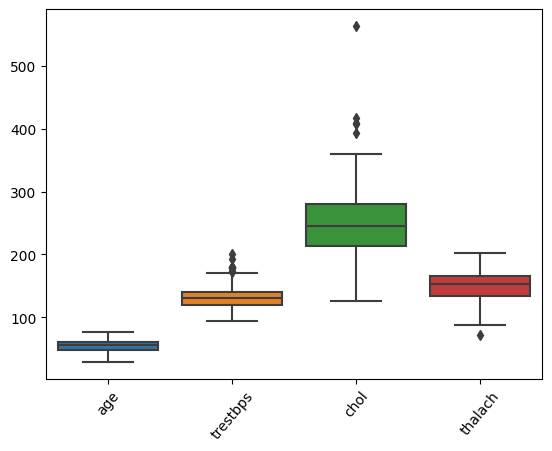

In [8]:
sns.boxplot(data=data[['age','trestbps','chol','thalach']])
plt.xticks(rotation=50)
plt.show()

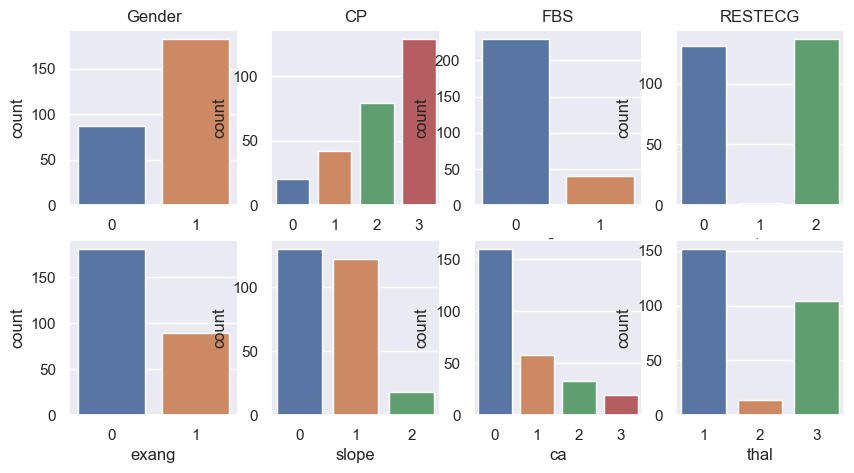

In [9]:
sns.set(rc={'figure.figsize':(10,5)})
fig, axes = plt.subplots(2,4)
sns.countplot(data=data,x='sex',ax=axes[0,0]).set(title='Gender')
sns.countplot(data=data,x='cp',ax=axes[0,1]).set(title='CP')
sns.countplot(data=data,x='fbs',ax=axes[0,2]).set(title='FBS')
sns.countplot(data=data,x='restecg',ax=axes[0,3]).set(title='RESTECG')
sns.countplot(data=data,x='exang',ax=axes[1,0])
sns.countplot(data=data,x='slope',ax=axes[1,1])
sns.countplot(data=data,x='ca',ax=axes[1,2])
sns.countplot(data=data,x='thal',ax=axes[1,3])
# or use fig.set_size_inches(row,column)
plt.show()

In [10]:
perc_gender = (data['sex'].value_counts())/len(data)*100
print(perc_gender.round())

1    68.0
0    32.0
Name: sex, dtype: float64


In [11]:
perc_restecg = (data['ca'].value_counts())/len(data)*100
print(perc_restecg.round())

0    59.0
1    21.0
2    12.0
3     7.0
Name: ca, dtype: float64


<AxesSubplot:>

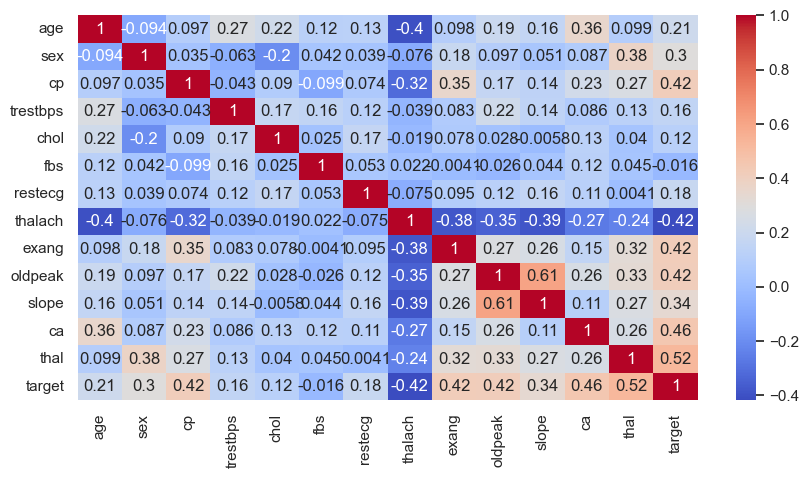

In [12]:
# create a heatmap using Seaborn
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [14]:
X=data.drop(columns='target')
y=data['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42 )

scale = StandardScaler().fit(X_train)

X_train_st = scale.transform(X_train)
X_test_st = scale.transform(X_test)

In [16]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [17]:
score = []
X_trains = [X_train,X_train_norm,X_train_st]
X_tests = [X_test,X_test_norm,X_test_st]

In [18]:
for X_train_set, X_test_set in zip(X_trains,X_tests):
    svc = SVC()
    svc.fit(X_train_set, y_train)
    y_pred=svc.predict(X_test_set)
    score.append(accuracy_score(y_pred,y_test))

In [19]:
pd.DataFrame({'score': score}, index = ['Original', 'Normalized', 'Standardized'])

,score
Original,0.629630
Normalized,0.851852
Standardized,0.870370


In [20]:
score_b = []
for X_train_set, X_test_set in zip(X_trains,X_tests):
    xgc = XGBClassifier()
    xgc.fit(X_train_set, y_train)
    y_pred=xgc.predict(X_test_set)
    score_b.append(accuracy_score(y_test,y_pred))

In [21]:
pd.DataFrame({'score': score_b}, index = ['Original', 'Normalized', 'Standardized'])

,score
Original,0.814815
Normalized,0.814815
Standardized,0.796296


In [22]:
score_c = []
for X_train_set, X_test_set in zip(X_trains,X_tests):
    rfc = RandomForestClassifier()
    rfc.fit(X_train_set, y_train)
    y_pred=rfc.predict(X_test_set)
    score_c.append(accuracy_score(y_test,y_pred))

In [23]:
pd.DataFrame({'score': score_c}, index = ['Original', 'Normalized', 'Standardized'])

,score
Original,0.833333
Normalized,0.870370
Standardized,0.870370


In [24]:
perm_importance = permutation_importance(xgc, X_train_set, y_train)
sort = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sort], X_test.columns[sort], columns=['Value'])

In [25]:
columns = X_test.columns

<AxesSubplot:>

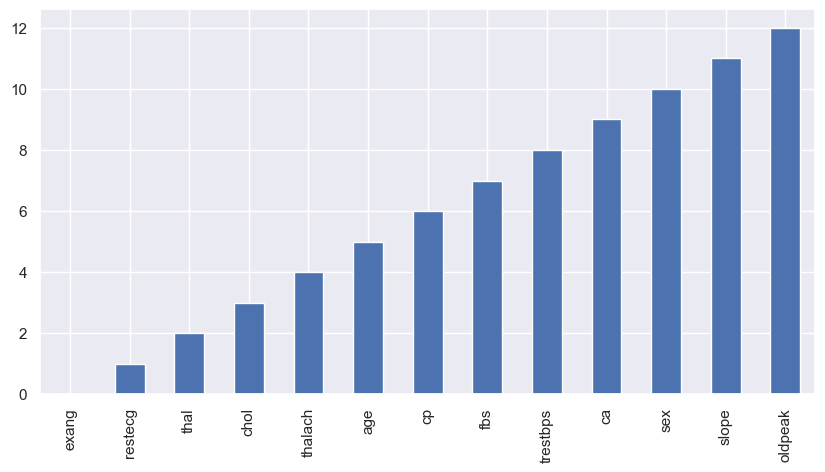

In [26]:
dt = pd.Series(sort,columns)
dt = dt.sort_values(ascending=True)
dt.plot.bar()